In [1]:
from numpy import uint8, uint16
from pandas import concat, read_csv

UINT8_ONE = uint8(1)
CATEGORY_MAP = {"2": UINT8_ONE, "D": UINT8_ONE, "S": uint8(2)}
UINT8_ZERO = uint8(0)
UINT16_ZERO = uint16(0)
convert_category = lambda value: CATEGORY_MAP.get(value.replace(" ", ""), UINT8_ZERO)
convert_numeric = lambda value: uint16(value.replace(" ", "").replace(",", "")) if value else UINT16_ZERO
CSV_KEYS = "DE", "DR", "V"
CONVERTERS = {
    "T": convert_category,
    "R": convert_category,
    "E": convert_numeric,
    "A": convert_numeric,
    "DE": convert_numeric,
    "DA": convert_numeric,
    "H": convert_numeric,
    "M": convert_numeric
}
df = concat(
    (read_csv(f"R/{key}.csv", index_col=0, converters=CONVERTERS) for key in CSV_KEYS), keys=CSV_KEYS, names=("RE",)
)
df

T  R   E  A  DE    DA     H     M
RE I                                     
DE 1    0  0   0  0   8  2947  1425  4611
   1    0  1   1  0   3  1818     0   650
   1    0  1   2  0   7  4735   487   308
   1    0  2   1  0   3  2078  2748     0
   1    0  2   1  1   3   269  5848   189
...    .. ..  .. ..  ..   ...   ...   ...
V  467  1  0   7  2   4  6453     0  9665
   467  1  1  10  0   5  6272    62  1417
   467  1  1   6  1   7  5267    78    76
   467  1  2   5  1   6  4602  8211   716
   467  1  2   2  5   7  1979  7396   329

[9110 rows x 8 columns]

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 9110 entries, ('DE', np.int64(1)) to ('V', np.int64(467))
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   T       9110 non-null   uint8 
 1   R       9110 non-null   uint8 
 2   E       9110 non-null   uint16
 3   A       9110 non-null   uint16
 4   DE      9110 non-null   uint16
 5   DA      9110 non-null   uint16
 6   H       9110 non-null   uint16
 7   M       9110 non-null   uint16
dtypes: uint16(6), uint8(2)
memory usage: 171.3+ KB


In [3]:
from math import floor, log10

result = df.iloc[:, :2]
for col in df.columns.to_list()[2:]:
    for digit_index in range(floor(log10(df[col].max())), -1, -1):
        result[f"{col}{digit_index}"] = (df[col].to_numpy() // 10 ** digit_index % 10).astype(uint8)
result[10:20]

T  R  E1  E0  A1  A0  DE1  DE0  DA4  DA3  ...  H4  H3  H2  H1  H0  M4  \
RE I                                            ...                           
DE 2  0  0   2   3   0   9    1    0    1    0  ...   0   0   1   6   3   0   
   2  0  1   2   2   0   3    0    4    0    7  ...   0   0   0   0   0   0   
   2  0  1   2   1   0   2    1    1    1    1  ...   0   1   3   0   4   0   
   2  0  2   0   0   2   8    1    0    0    0  ...   1   1   7   2   6   0   
   2  0  2   1   7   1   4    0    7    0    3  ...   0   9   8   0   5   0   
   2  1  2   1   3   1   4    0    7    0    3  ...   0   8   4   7   3   0   
   2  1  2   1   8   2   0    0    7    0    5  ...   1   1   9   2   2   0   
   2  1  1   3   2   0   3    0    6    1    0  ...   0   0   2   4   8   0   
   2  1  1   2   4   0   1    0    7    0    8  ...   0   0   0   0   0   0   
   2  1  0   2   6   1   2    0    8    0    9  ...   0   0   0   0   0   0   

      M3  M2  M1  M0  
RE I                  
DE 2   5   7   8   9  
   2   0   3   4   0  
   2   0   2   3   1  
   2   0   0   0   0  
   2   0   6   6   6  
   2   0   3   1   6  
   2   0   4   6   9  
   2   1   2   8   1  
   2   0   0   0   0  
   2   6   9   4   3  

[10 rows x 23 columns]

In [4]:
reshaped_tuple = tuple(result.to_numpy().T.reshape(23, -1, 10))
len(reshaped_tuple), reshaped_tuple[0].shape

(23, (911, 10))

2025-12-28 09:21:07.989559: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1766913668.007346     373 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1766913668.012962     373 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1766913668.030050     373 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1766913668.030096     373 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1766913668.030098     373 computation_placer.cc:177] computation placer alr

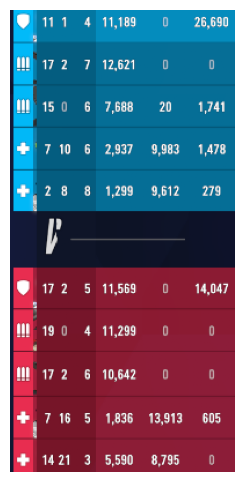

[[0 0 1 1 0 1 0 4 1 1 1 8 9 0 0 0 0 0 2 6 6 9 0]
 [0 1 1 7 0 2 0 7 1 2 6 2 1 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 5 0 0 0 6 0 7 6 8 8 0 0 0 2 0 0 1 7 4 1]
 [0 2 0 7 1 0 0 6 0 2 9 3 7 0 9 9 8 3 0 1 4 7 8]
 [0 2 0 2 0 8 0 8 0 1 2 9 9 0 9 6 1 2 0 0 2 7 9]
 [1 0 1 7 0 2 0 5 1 1 5 6 9 0 0 0 0 0 1 4 0 4 7]
 [1 1 1 9 0 0 0 4 1 1 2 9 9 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 7 0 2 0 6 1 0 6 4 2 0 0 0 0 0 0 0 0 0 0]
 [1 2 0 7 1 6 0 5 0 1 8 3 6 1 3 9 1 3 0 0 6 0 5]
 [1 2 1 4 2 1 0 3 0 5 5 9 0 0 8 7 9 5 0 0 0 0 0]]


2025-12-28 09:21:14.263814: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [5]:
from pathlib import Path
from tensorflow.random import shuffle
import tensorflow as tf
from tensorflow import gather
from tensorflow.data import Dataset, AUTOTUNE
from tensorflow.image import decode_png, resize
from tensorflow.io import read_file
from matplotlib.pyplot import figure, axis, imshow, show
from numpy import array

image_paths = sorted(map(str, Path().rglob("*.png")))

data_count = len(image_paths)
indices = shuffle(tf.range(data_count))
X_shuffled = gather(image_paths, indices)
y_shuffled = tuple(gather(y, indices) for y in reshaped_tuple)

train_size = int(data_count * .9)
train_X = X_shuffled[:train_size]
val_X = X_shuffled[train_size:]

train_y = tuple(y[:train_size] for y in y_shuffled)
val_y = tuple(y[train_size:] for y in y_shuffled)


def preprocess_image(path, label):
    image = decode_png(read_file(path), channels=3)[230:930, 530:1370]
    hud_parts = [
        image[:, :40], image[:, 390:420], image[:, 450:480],
        image[:, 500:530], image[:, 570:640], image[:, 670:740], image[:, 770:]
    ]
    cropped = tf.concat(hud_parts, axis=1)
    resized = resize(cropped, (400, 194)) / 255
    return resized, label


def make_dataset(X, y, shuffle=False, batch_size=32):
    ds = Dataset.from_tensor_slices((X, y))
    ds = ds.map(preprocess_image, num_parallel_calls=AUTOTUNE)
    ds = ds.batch(batch_size).prefetch(AUTOTUNE)
    return ds


train_ds = make_dataset(train_X, train_y, shuffle=True)
val_ds = make_dataset(val_X, val_y, shuffle=False)
for x_batch, y_batch in train_ds.take(1):
    figure(figsize=(6, 6))
    axis("off")
    imshow(x_batch[0])
    show()
    print(array(y_batch).reshape(23, -1).T.reshape(-1, 10, 23)[0])

In [6]:
from tensorflow.keras import layers, models

In [7]:
class LearnablePositionalEncoding2D(tf.keras.layers.Layer):
    def __init__(self, height, width, channels):
        super().__init__()
        self.pe = self.add_weight((1, height, width, channels), "random_normal")

    def call(self, x):
        return x + self.pe

In [8]:
def transformer_block(x, num_heads=8, key_dim=64, ff_dim=512, dropout=0.1):
    attn = layers.MultiHeadAttention(num_heads, key_dim)(x, x)
    attn = layers.Dropout(dropout)(attn)
    x = layers.LayerNormalization()(x + attn)

    ffn = layers.Dense(ff_dim, "relu")(x)
    ffn = layers.Dense(x.shape[-1])(ffn)
    ffn = layers.Dropout(dropout)(ffn)

    return layers.LayerNormalization()(x + ffn)

In [9]:
unique_count = result.nunique()


def build_model(image_size=x_batch.shape[1:]):  # (400, 194, 3)
    inputs = layers.Input(shape=image_size)

    # CNN Backbone (Transfer Learning)
    backbone = tf.keras.applications.ResNet50V2(False, input_tensor=inputs)

    x = backbone.output  # (H', W', C)
    x = layers.Conv2D(256, 1, activation="relu")(x)

    # Resize to grid size
    x = layers.Resizing(10, 23)(x)

    # Positional Encoding
    x = LearnablePositionalEncoding2D(10, 23, 256)(x)

    # Flatten for Transformer
    x = layers.Reshape((10 * 23, 256))(x)

    # Transformer Encoder
    for _ in range(4):
        x = transformer_block(x)

    # Restore grid
    x = layers.Reshape((10, 23, 256))(x)

    outputs = []
    for idx, key in enumerate(result):
        outputs.append(layers.Dense(unique_count[key], name=f"{idx:02d}_{key}")(x[:, :, idx, :]))
    
    model = models.Model(inputs, outputs)
    return model

In [10]:
from numpy import unique


def sparse_categorical_focal_loss(
        gamma=2.0,
        alpha=None,  # list or tensor of shape (num_classes,)
        from_logits=False
):
    def loss_fn(y_true, y_pred):
        y_true = tf.cast(y_true, tf.int32)

        if from_logits:
            y_pred = tf.nn.softmax(y_pred, axis=-1)

        # one-hot
        num_classes = tf.shape(y_pred)[-1]
        y_true_oh = tf.one_hot(y_true, depth=num_classes)

        # p_t
        p_t = tf.reduce_sum(y_true_oh * y_pred, axis=-1)
        p_t = tf.clip_by_value(p_t, 1e-7, 1.0)

        # alpha_t (정답 클래스의 alpha 선택)
        if alpha is not None:
            alpha_tensor = tf.constant(alpha, dtype=tf.float32)  # ← 여기서 재할당 피함
            alpha_t = tf.reduce_sum(y_true_oh * alpha_tensor, axis=-1)
        else:
            alpha_t = 1.0

        loss = -alpha_t * tf.pow(1.0 - p_t, gamma) * tf.math.log(p_t)
        return tf.reduce_mean(loss)

    return loss_fn


losses = []
weights = []
for y in reshaped_tuple:
    counts = unique(y, return_counts=True)[1]
    r = 1 / counts
    w = r / sum(r) * len(counts)
    weights.append(w)
    losses.append(sparse_categorical_focal_loss(alpha=w, from_logits=True))

In [14]:
for w in weights:
    print(w.mean())

1.0
0.9999999999999999
1.0
1.0000000000000002
1.0
0.9999999999999998
1.0
1.0
0.9999999999999999
1.0
0.9999999999999998
0.9999999999999998
1.0000000000000002
1.0
1.0
0.9999999999999998
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [59]:
from tensorflow.keras.backend import clear_session
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy

clear_session()
model = build_model()
model.compile(AdamW(), losses, metrics=[SparseCategoricalAccuracy] * 23)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 400, 194,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 406, 200,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 200, 97,   │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 202, 99,   │          0 │ conv1_conv[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 100, 49,   │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 100, 49,   │        256 │ pool1_pool[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 100, 49,   │          0 │ conv2_block1_pre… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 100, 49,   │      4,096 │ conv2_block1_pre… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 100, 49,   │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 100, 49,   │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_pad  │ (None, 102, 51,   │          0 │ conv2_block1_1_r… │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 100, 49,   │     36,864 │ conv2_block1_2_p… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 100, 49,   │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 100, 49,   │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 100, 49,   │     16,640 │ conv2_block1_pre… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 100, 49,   │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_out    │ (None, 100, 49,   │          0 │ conv2_block1_0_c

 Total params: 27,354,805 (104.35 MB)

 Trainable params: 27,309,365 (104.18 MB)

 Non-trainable params: 45,440 (177.50 KB)

In [60]:
from tensorflow.keras.callbacks import EarlyStopping

history = model.fit(
    train_ds,
    epochs=256,
    callbacks=EarlyStopping(patience=16, verbose=1, restore_best_weights=True),
    validation_data=val_ds
)

Epoch 1/256


I0000 00:00:1766821119.343326     153 service.cc:152] XLA service 0x784a84006d10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1766821119.343378     153 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Ti, Compute Capability 8.6
2025-12-27 07:38:40.646613: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1766821125.300737     153 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-12-27 07:38:49.660738: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_183', 108 bytes spill stores, 116 bytes spill loads

2025-12-27 07:38:49.749239: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1

25/26 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - dense_10_loss: 0.0633 - dense_10_sparse_categorical_accuracy: 0.1798 - dense_11_loss: 2.1923 - dense_11_sparse_categorical_accuracy: 0.1015 - dense_12_loss: 0.0050 - dense_12_sparse_categorical_accuracy: 0.1455 - dense_13_loss: 1.8309 - dense_13_sparse_categorical_accuracy: 0.1015 - dense_14_loss: 0.0156 - dense_14_sparse_categorical_accuracy: 0.3686 - dense_15_loss: 2.1611 - dense_15_sparse_categorical_accuracy: 0.0917 - dense_16_loss: 0.0473 - dense_16_sparse_categorical_accuracy: 0.2773 - dense_17_loss: 2.1173 - dense_17_sparse_categorical_accuracy: 0.1072 - dense_18_loss: 2.2475 - dense_18_sparse_categorical_accuracy: 0.1002 - dense_19_loss: 2.3720 - dense_19_sparse_categorical_accuracy: 0.0954 - dense_20_loss: 2.2318 - dense_20_sparse_categorical_accuracy: 0.1105 - dense_21_loss: 0.0273 - dense_21_sparse_categorical_accuracy: 0.3941 - dense_22_loss: 1.1074 - dense_22_sparse_categorical_accuracy: 0.1053 - dense_23_loss: 1.5262 - dense_23_s

2025-12-27 07:39:50.528600: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_191', 432 bytes spill stores, 344 bytes spill loads

2025-12-27 07:39:50.578521: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_191', 108 bytes spill stores, 116 bytes spill loads

2025-12-27 07:39:50.760531: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_191', 428 bytes spill stores, 340 bytes spill loads

2025-12-27 07:39:50.801483: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_192', 24 bytes spill stores, 24 bytes spill loads

2025-12-27 07:39:51.193752: I external

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - dense_10_loss: 0.0631 - dense_10_sparse_categorical_accuracy: 0.1805 - dense_11_loss: 2.1861 - dense_11_sparse_categorical_accuracy: 0.1013 - dense_12_loss: 0.0050 - dense_12_sparse_categorical_accuracy: 0.1485 - dense_13_loss: 1.8236 - dense_13_sparse_categorical_accuracy: 0.1021 - dense_14_loss: 0.0155 - dense_14_sparse_categorical_accuracy: 0.3668 - dense_15_loss: 2.1547 - dense_15_sparse_categorical_accuracy: 0.0920 - dense_16_loss: 0.0469 - dense_16_sparse_categorical_accuracy: 0.2781 - dense_17_loss: 2.1111 - dense_17_sparse_categorical_accuracy: 0.1071 - dense_18_loss: 2.2397 - dense_18_sparse_categorical_accuracy: 0.1002 - dense_19_loss: 2.3613 - dense_19_sparse_categorical_accuracy: 0.0954 - dense_20_loss: 2.2241 - dense_20_sparse_categorical_accuracy: 0.1103 - dense_21_loss: 0.0273 - dense_21_sparse_categorical_accuracy: 0.3911 - dense_22_loss: 1.1043 - dense_22_sparse_categorical_accuracy: 0.1062 - dense_23_loss: 1.5210 - dense_23_spar

2025-12-27 07:40:49.242504: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_65', 432 bytes spill stores, 344 bytes spill loads

2025-12-27 07:40:49.290769: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_65', 428 bytes spill stores, 340 bytes spill loads

2025-12-27 07:40:49.427832: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_65', 108 bytes spill stores, 116 bytes spill loads

2025-12-27 07:40:49.629037: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_66', 236 bytes spill stores, 236 bytes spill loads

2025-12-27 07:40:49.836184: I external/l

26/26 ━━━━━━━━━━━━━━━━━━━━ 171s 3s/step - dense_10_loss: 0.0630 - dense_10_sparse_categorical_accuracy: 0.1813 - dense_11_loss: 2.1805 - dense_11_sparse_categorical_accuracy: 0.1011 - dense_12_loss: 0.0051 - dense_12_sparse_categorical_accuracy: 0.1512 - dense_13_loss: 1.8169 - dense_13_sparse_categorical_accuracy: 0.1027 - dense_14_loss: 0.0154 - dense_14_sparse_categorical_accuracy: 0.3650 - dense_15_loss: 2.1488 - dense_15_sparse_categorical_accuracy: 0.0922 - dense_16_loss: 0.0466 - dense_16_sparse_categorical_accuracy: 0.2789 - dense_17_loss: 2.1055 - dense_17_sparse_categorical_accuracy: 0.1069 - dense_18_loss: 2.2325 - dense_18_sparse_categorical_accuracy: 0.1001 - dense_19_loss: 2.3514 - dense_19_sparse_categorical_accuracy: 0.0954 - dense_20_loss: 2.2169 - dense_20_sparse_categorical_accuracy: 0.1102 - dense_21_loss: 0.0273 - dense_21_sparse_categorical_accuracy: 0.3884 - dense_22_loss: 1.1015 - dense_22_sparse_categorical_accuracy: 0.1071 - dense_23_loss: 1.5162 - dense_23_sp

In [75]:
items = []
for item in history.history.items():
    if key.startswith("val_") and key.endswith("_sparse_categorical_accuracy"):
        items.append((key, value))
items.sort(key=lambda item: item[1])
for key, value in items:
    print(f"{key}: {value}")

val_dense_10_sparse_categorical_accuracy: 0.9152173399925232
val_dense_11_sparse_categorical_accuracy: 0.9956521391868591
val_dense_12_sparse_categorical_accuracy: 0.6423913836479187
val_dense_13_sparse_categorical_accuracy: 0.9956521391868591
val_dense_14_sparse_categorical_accuracy: 0.9163042902946472
val_dense_15_sparse_categorical_accuracy: 0.997826099395752
val_dense_16_sparse_categorical_accuracy: 0.9706522226333618
val_dense_17_sparse_categorical_accuracy: 0.988043487071991
val_dense_18_sparse_categorical_accuracy: 0.979347825050354
val_dense_19_sparse_categorical_accuracy: 0.9826087355613708
val_dense_20_sparse_categorical_accuracy: 0.989130437374115
val_dense_21_sparse_categorical_accuracy: 0.9423912763595581
val_dense_22_sparse_categorical_accuracy: 0.97826087474823
val_dense_23_sparse_categorical_accuracy: 0.968478262424469
val_dense_24_sparse_categorical_accuracy: 0.9152173399925232
val_dense_25_sparse_categorical_accuracy: 0.9869565367698669
val_dense_26_sparse_categorical

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


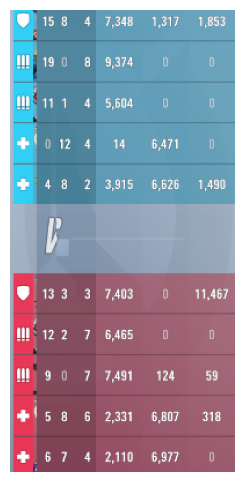

In [95]:
from numpy import array

for x_batch, y_batch in val_ds.take(1):
    x_sample = x_batch[0:1]
    y_sample = tuple(y[0] for y in y_batch)
    y_pred = tuple(y[0] for y in model.predict(x_sample))
    figure(figsize=(6, 6))
    axis("off")
    imshow(x_batch[0])
    show()

In [122]:
y_true_0 = array(y_sample).T
y_pred_0 = array([y.argmax(1) for y in y_pred]).T
for y1, y2 in zip(y_true_0, y_pred_0):
    for y3, y4, y5 in zip(y1, y2, y1 == y2):
        if y5:
            print(f"{y3} == {y4}", end="  ")
        else:
            print(f"{y3} != {y4}", end="  ")
    print()

0 == 0  0 == 0  1 == 1  5 == 5  0 == 0  8 == 8  0 == 0  4 == 4  0 == 0  7 == 7  3 == 3  4 == 4  8 == 8  0 == 0  1 == 1  3 == 3  1 == 1  7 == 7  0 == 0  1 == 1  8 == 8  5 == 5  3 == 3  
0 == 0  1 == 1  1 == 1  9 == 9  0 == 0  0 == 0  0 == 0  8 == 8  0 == 0  9 == 9  3 == 3  7 == 7  4 == 4  0 == 0  0 == 0  0 == 0  0 == 0  0 == 0  0 == 0  0 == 0  0 == 0  0 == 0  0 == 0  
0 == 0  1 == 1  1 == 1  1 == 1  0 == 0  1 == 1  0 != 1  4 == 4  0 == 0  5 == 5  6 == 6  0 == 0  4 == 4  0 == 0  0 == 0  0 == 0  0 == 0  0 == 0  0 == 0  0 == 0  0 == 0  0 == 0  0 == 0  
0 == 0  2 == 2  0 == 0  0 == 0  1 != 2  2 == 2  0 == 0  4 == 4  0 == 0  0 == 0  0 == 0  1 == 1  4 != 0  0 == 0  6 == 6  4 == 4  7 == 7  1 == 1  0 == 0  0 == 0  0 == 0  0 == 0  0 == 0  
0 == 0  2 == 2  0 == 0  4 == 4  0 != 1  8 == 8  0 == 0  2 == 2  0 == 0  3 == 3  9 == 9  1 == 1  5 == 5  0 == 0  6 == 6  6 == 6  2 == 2  6 == 6  0 == 0  1 == 1  4 == 4  9 == 9  0 == 0  
1 == 1  0 == 0  1 == 1  3 == 3  0 == 0  3 == 3  0 == 0  3 == 3  0 == 0  7 =